# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [84]:
!/Windows/System32/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!/Windows/System32/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0   2209      0 --:--:-- --:--:-- --:--:--  2305
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0   286k      0 --:--:-- --:--:-- --:--:--  299k


In [86]:
# Take a peek at the datasets

#!head train.dat
#!head test.dat

#Using the following statements as in windows there is no head system command 
with open('train.dat') as f:
    for _ in range(10):
        print(f.readline())

with open('test.dat') as f:
    for _ in range(10):
        print(f.readline())

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	

1	1	0	0	0	0	0	0	1	1	0	0	1	0

0	0	1	1	0	1	1	0	0	0	0	0	1	0

0	1	0	1	1	0	1	0	1	1	1	0	1	1

0	0	1	0	0	1	0	1	0	1	1	1	1	0

0	1	0	0	0	0	0	1	1	1	1	1	1	0

0	1	1	1	0	0	0	1	0	1	1	0	1	1

0	1	1	0	0	0	1	0	0	0	0	0	1	0

0	0	0	1	1	0	1	1	1	0	0	0	1	0

0	0	0	0	0	0	1	0	1	0	1	0	1	0

X1	X2	X3

1	1	1	1

0	0	1	1

0	1	1	0

0	1	1	0

0	1	1	0

0	1	1	0

0	1	1	0

0	1	1	0

1	1	1	1



### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [118]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    dot_result = sum(x*y for x, y in zip(array1, array2))
    return dot_result 


def sigmoid(x):
    sigmoid_res = ( 1 / (1 + math.exp(-x)))
    return sigmoid_res

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    output_result = sigmoid(dot_product(instance,weight))
    return output_result

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    label = output(weights,instance)
    if label >= 0.5:
      return 1
    else:
      return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Weight initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Caluclating the Weighted sum, activation function and error
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
             #Updating the weights for each instance with learning rate,
            #error like gradient descent which provides the direction of weight
            #adjustments and output*(1-output) is the derivative of sigmoid function            
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [130]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




In [96]:
def train_perceptron1(instances, lr, epochs):

    #TODO: name this step

    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Caluclating the input values
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights
    
def train_perceptron2(instances, lr, epochs):

    #TODO: name this step

    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Caluclating the input values
            output = predict(weights, instance)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights


instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights1 = train_perceptron1(instances_tr, lr, epochs)
accuracy1 = get_accuracy(weights1, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy1:.1f}")

weights2 = train_perceptron2(instances_tr, lr, epochs)
accuracy2 = get_accuracy(weights2, instances_te)
print("Accuracy after using the code snippet")
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy2:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
Accuracy after using the code snippet
#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6


We can observe that before using the code snippet, the accuracy value is 71.4 which is high.High accuracy means the train data is good and results are very close to the true or correct value. The system, model, or measurement produces minimal errors.
While using the code snippet, the accuracy value is 28.6 which is low. Low accuracy means the results are far from the true or correct value. There are more significant errors or deviations.The model tends to Overfit.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [165]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

Accuracy_Hyperparameters = {
    lr: np.zeros((len(num_epochs), len(tr_percent))) for lr in lr_array
}

for tr_size in tr_percent:
  for lr in lr_array:
    for epochs in num_epochs:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]  # Subset of training instances
        #training on differnet hyperparameters on Train data
        weights = train_perceptron(pre_instances, lr, epochs)
        #accuracy is tested on test data
        accuracy = get_accuracy(weights, instances_te)
        Accuracy_Hyperparameters[lr][num_epochs.index(epochs),
                                     tr_percent.index(tr_size)] = accuracy
        
        # output after each training loop
        print(f"# tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
# tr:  20, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



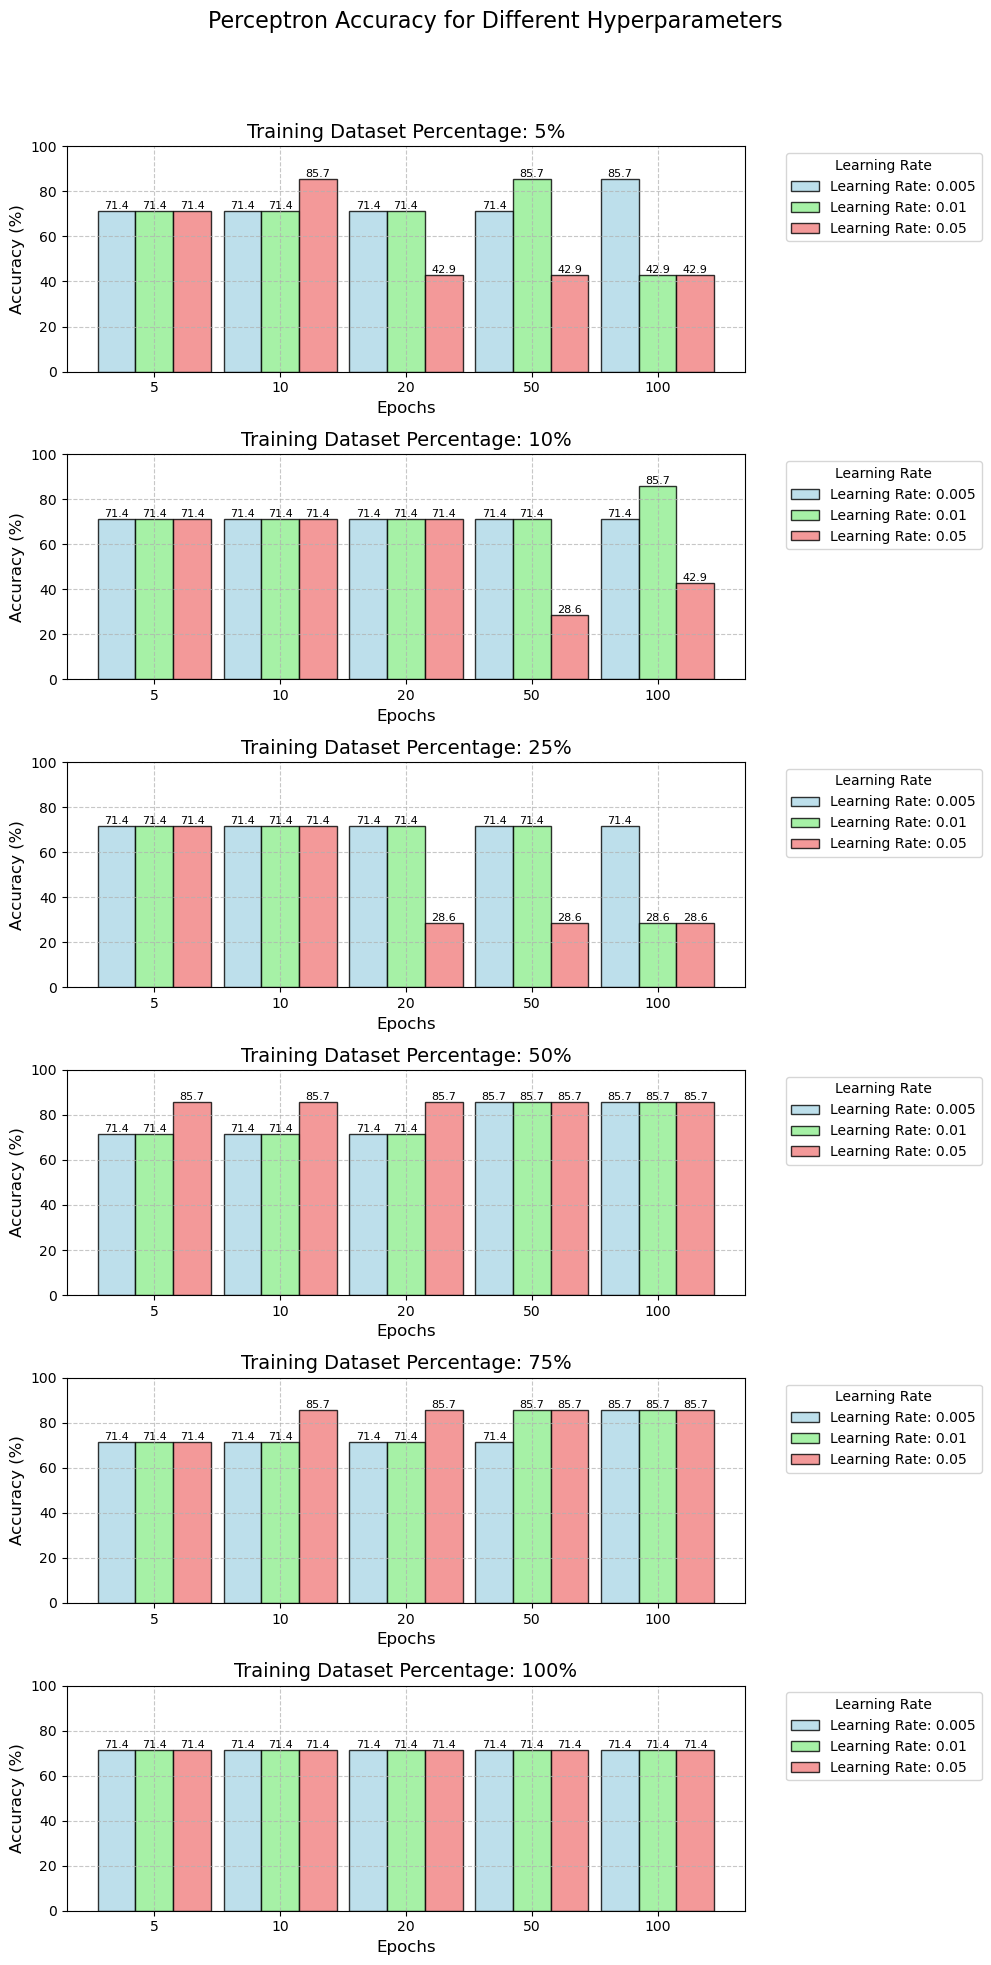

In [167]:
import matplotlib.pyplot as plt

# Detailed plotting: Each combination of epochs and training size for each learning rate
fig, axes = plt.subplots(len(tr_percent), 1, figsize=(10, 20), sharex=False)

# Softer colors for the bars
colors = ['#ADD8E6', '#90EE90', '#F08080']  # Light blue, light green, light coral

for ax, tr in zip(axes, tr_percent):
    bar_width = 0.30
    opacity = 0.8

    for i, lr in enumerate(lr_array):
        # Positions of bars on the x-axis
        index = np.arange(len(num_epochs))
        bar_positions = index + i * bar_width

        # Plot the bars from the accuracy table
        ax.bar(bar_positions,
               Accuracy_Hyperparameters[lr][:, tr_percent.index(tr)], bar_width,
               alpha=opacity, label=f'Learning Rate: {lr}', color=colors[i],
                edgecolor='black')

        # Annotating the bars for clarity
        for j, acc in enumerate(Accuracy_Hyperparameters[lr][:, tr_percent.index(tr)]):
            ax.annotate(f'{acc:.1f}', (bar_positions[j], acc),
                        ha='center', va='bottom', fontsize=8)

    ax.set_title(f'Training Dataset Percentage: {tr}%', fontsize=14)
    ax.set_xlabel('Epochs', fontsize=12)
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.set_xticks(index + bar_width * (len(lr_array) - 1) / 2)
    ax.set_xticklabels(num_epochs)  # Ensures all epochs labels show up clearly
    ax.set_ylim(0, 100)  # Assuming accuracy range, can be adjusted
    ax.legend(title='Learning Rate', fontsize=10, bbox_to_anchor=(1.05, 1))
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(index + bar_width * (len(lr_array) - 1) / 2, num_epochs)  # Ensures all epochs labels show up clearly

plt.suptitle('Perceptron Accuracy for Different Hyperparameters', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for better fitting
plt.subplots_adjust(right=0.75)  # Adjust space on the right for the legend
plt.show()

The bar graph is the representation of accuracy rise and drops for each training sizes but different learning rate and epochs.
We can observe that 

•	When compared with the accuracies, When the training dataset size is more than 50%, We have observed good accuracy of 85.7 %
•	When the training dataset size is below 50%, the accuracy is lowest at 42.9%.
•	When the learning rate is 0.005, The model converges slowly and observed that for almost all the epochs, the accuracy is same within the same training size
•	We can observe that the model have same accuracy when we have limited epochs.


A: Do you need to train with all the training dataset to get the highest accuracy with the test dataset? 


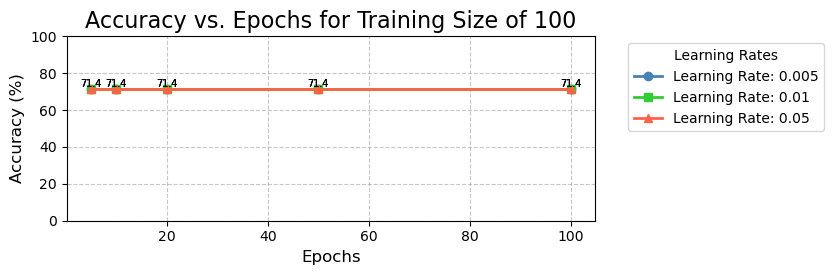

In [172]:
# Filter to get accuracies for training size of 100
tr_size_index = tr_percent.index(100)

# Colors and markers
colors = ['#4682B4', '#32CD32', '#FF6347', '#FFD700', '#FF4500']  # Various colors
markers = ['o', 's', '^', 'D', 'x']  # Different markers

# Create the plot
plt.figure(figsize=(8, 3))

for i, lr in enumerate(lr_array):
    accuracies = [Accuracy_Hyperparameters[lr][j, tr_size_index] for j in range(len(num_epochs))]

    # Plot lines grouped by learning rates
    plt.plot(num_epochs, accuracies,
             color=colors[i % len(colors)], marker=markers[i % len(markers)], linestyle='-', linewidth=2,
             label=f'Learning Rate: {lr}')

    # Annotate points with accuracy values
    for epoch, acc in zip(num_epochs, accuracies):
        plt.annotate(f'{acc:.1f}', (epoch, acc), ha='center', va='bottom', fontsize=7)

plt.title('Accuracy vs. Epochs for Training Size of 100', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Learning Rates', fontsize=10, bbox_to_anchor=(1.05, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(right=0.75)  # Space for legends
plt.show()

Not necessarily. 
While increasing the training data generally improves model generalization,  beyond a certain point, adding more data may not significantly improve accuracy.Here we can observe that the accuracy percentage is constant at 71.4%
In some cases, a well-optimized model trained on a subset of the data might outperform a poorly tuned model trained on the full dataset. Overfitting can also play a role—if the model becomes too specialized to the training data, its performance on unseen test data may degrade.

B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?


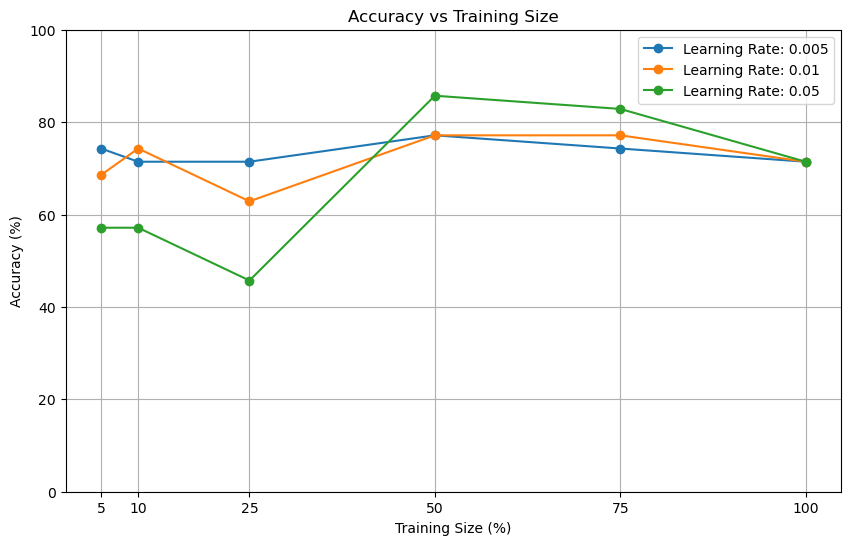

In [181]:
plt.figure(figsize=(10, 6))

for lr, accuracies in Accuracy_Hyperparameters.items():
    # Calculate the mean accuracy for each training size,mean of epochs
    mean_accuracies = np.mean(accuracies, axis=0)
    plt.plot(tr_percent, mean_accuracies, marker='o', label=f'Learning Rate: {lr}')

plt.title('Accuracy vs Training Size')
plt.xlabel('Training Size (%)')
plt.ylabel('Accuracy (%)')
plt.xticks(tr_percent)
plt.ylim(0, 100)  # Set y-axis limits for better visualization
plt.legend()
plt.grid()
plt.show()

If the second run uses a larger training set but achieves worse accuracy, it could be due to overfitting, suboptimal hyperparameters (e.g., learning rate too high), or insufficient regularization. The plot helps identify this by showing how accuracy trends with different hyperparameters and dataset sizes.
From the graph, we can observe that when training sizes are 5 and 10,the accuracy percentage decreased with learning rates of 0.005 and 0.01.


C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
Achieving higher accuracy (above 80.0) with additional hyperparameters is possible, but it depends on the dataset, model architecture, and the specific hyperparameters being tuned. 
We can use different learning rates or use learning rate schedulers while tuning hyperparameter.
We can increase the depth or width of the model and try different optimizers while tuning hyperparameters.
We can achieve higher accuracy when we use more advanced architectures for the model.
We can apply data augmentation techniques to increase the diversity of the training data (e.g., rotation, flipping, cropping).
We can use domain-specific knowledge to enhance the dataset and can achieve high accuracy.
We can implement hyperparameter optimization tools like Optuna, Hyperopt, or Bayesian Optimization.


D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
No, training for more epochs is not always beneficial. 
•	If the model is trained for too many epochs, it may start memorizing the training data rather than generalizing well to unseen test data. This often leads to a decrease in test accuracy even though training accuracy continues to rise.
•	In our case, When train size is 10% and Learning rate is 0.10 then number of epochs when increased from 50 to 100,We have rise in accuracy from 71.4 to 85.7% The accuracy is increased when the epoch was increased.
•	If we have small learning rates, It takes more time to converge so we require more number of epochs to get good accuracy.
•	When we have more learning rate, It will converges fast jumping to the solutions. Even increasing the epochs will not improve the accuracy. 
•	When train size is 25% and learning rate is 0.05, There was huge drop in accuracy from 71.4 to least 28.6 when increases in epochs from 10 to 20.
•	A common strategy to counter unnecessary training is early stopping, where training is halted once validation accuracy stops improving. This prevents overfitting and saves computational resources.
